In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [28]:
path = "ceidg_data_surv.csv"
df = pd.read_csv(path)

In [27]:
df.columns

Index(['Status', 'YearOfStartingOfTheBusiness', 'DateOfStartingOfTheBusiness',
       'DateOfTermination', 'Terminated', 'DurationOfExistenceInMonths',
       'MainAddressVoivodeship', 'MainAddressCounty', 'MainAddressTERC',
       'CorrespondenceAddressVoivodeship', 'CorrespondenceAddressCounty',
       'CorrespondenceAddressTERC', 'MainAndCorrespondenceAreTheSame',
       'NoOfAdditionalPlaceOfTheBusiness', 'IsPhoneNo', 'IsEmail', 'IsWWW',
       'CommunityProperty', 'HasLicences', 'NoOfLicences', 'Sex',
       'HasPolishCitizenship', 'ShareholderInOtherCompanies', 'PKDMainSection',
       'PKDMainDivision', 'PKDMainGroup', 'PKDMainClass',
       'NoOfUniquePKDSections', 'NoOfUniquePKDDivsions', 'NoOfUniquePKDGroups',
       'NoOfUniquePKDClasses'],
      dtype='object')

In [39]:
df['Month'] = df.DateOfStartingOfTheBusiness.str.split("-").str[1]
df['Month'] = pd.to_numeric(df['Month'])


In [29]:
df.corr()

,YearOfStartingOfTheBusiness,Terminated,DurationOfExistenceInMonths,MainAddressTERC,CorrespondenceAddressTERC,MainAndCorrespondenceAreTheSame,NoOfAdditionalPlaceOfTheBusiness,IsPhoneNo,IsEmail,IsWWW,...,NoOfLicences,HasPolishCitizenship,ShareholderInOtherCompanies,PKDMainDivision,PKDMainGroup,PKDMainClass,NoOfUniquePKDSections,NoOfUniquePKDDivsions,NoOfUniquePKDGroups,NoOfUniquePKDClasses
YearOfStartingOfTheBusiness,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Terminated,NaN,1.000000,-0.844500,0.002358,-0.001377,-0.004282,-0.113983,-0.136538,-0.030193,-0.068204,...,-0.150961,-0.059464,-0.183841,-0.081394,-0.080899,-0.080795,-0.167314,-0.153467,-0.123186,-0.093383
DurationOfExistenceInMonths,NaN,-0.844500,1.000000,-0.001526,0.002562,0.005911,0.104404,0.130019,0.021912,0.067996,...,0.139475,0.091899,0.153321,0.064294,0.063742,0.063627,0.196479,0.181235,0.147084,0.114303
MainAddressTERC,NaN,0.002358,-0.001526,1.000000,0.991052,-0.014570,0.006955,-0.006736,-0.076122,-0.008717,...,0.005647,-0.018467,0.000255,-0.013811,-0.013866,-0.013860,0.001858,0.002064,0.002401,0.002509
CorrespondenceAddressTERC,NaN,-0.001377,0.002562,0.991052,1.000000,0.004393,0.007272,-0.005985,-0.074625,-0.007296,...,0.007333,-0.007429,0.000849,-0.012455,-0.012525,-0.012518,0.003343,0.003516,0.003661,0.003694
MainAndCorrespondenceAreTheSame,NaN,-0.004282,0.005911,-0.014570,0.004393,1.000000,-0.015443,0.004592,0.021863,0.016477,...,0.005124,0.221206,-0.001481,-0.028513,-0.028682,-0.028699,0.027773,0.030626,0.023511,0.020942
NoOfAdditionalPlaceOfTheBusiness,NaN,-0.113983,0.104404,0.006955,0.007272,-0.015443,1.000000,0.024622,0.023501,0.033492,...,0.132748,0.017766,0.121367,0.020995,0.021169,0.021176,0.108301,0.095644,0.091540,0.077343
IsPhoneNo,NaN,-0.136538,0.130019,-0.006736,-0.005985,0.004592,0.024622,1.000000,0.093526,0.114941,...,0.026595,0.024515,0.017226,0.017650,0.017557,0.017540,0.051440,0.049191,0.041847,0.033637
IsEmail,NaN,-0.030193,0.021912,-0.076122,-0.074625,0.021863,0.023501,0.093526,1.000000,0.190678,...,-0.004652,0.054955,0.013090,0.142794,0.142654,0.142667,0.155392,0.137555,0.110731,0.088570
IsWWW,NaN,-0.068204,0.067996,-0.008717,-0.007296,0.016477,0.033492,0.114941,0.190678,1.000000,...,0.000513,0.032251,0.029169,0.058826,0.058660,0.058643,0.131606,0.124139,0.102603,0.085528


YearOfStartingOfTheBusiness              NaN
Terminated                         -0.844500
DurationOfExistenceInMonths         1.000000
MainAddressTERC                    -0.001526
CorrespondenceAddressTERC           0.002562
MainAndCorrespondenceAreTheSame     0.005911
NoOfAdditionalPlaceOfTheBusiness    0.104404
IsPhoneNo                           0.130019
IsEmail                             0.021912
IsWWW                               0.067996
HasLicences                         0.190643
NoOfLicences                        0.139475
HasPolishCitizenship                0.091899
ShareholderInOtherCompanies         0.153321
PKDMainDivision                     0.064294
PKDMainGroup                        0.063742
PKDMainClass                        0.063627
NoOfUniquePKDSections               0.196479
NoOfUniquePKDDivsions               0.181235
NoOfUniquePKDGroups                 0.147084
NoOfUniquePKDClasses                0.114303
Name: DurationOfExistenceInMonths, dtype: float64


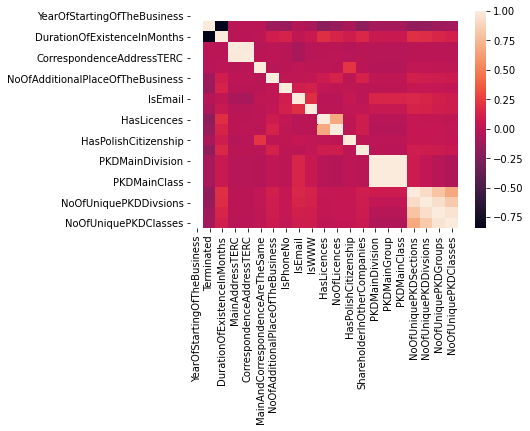

In [14]:
print(df.corr()['DurationOfExistenceInMonths'])
sns.heatmap(df.corr())

In [15]:
df = df.drop(columns=['MainAddressTERC', 'CorrespondenceAddressTERC'])

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f78373b0198>,
      dtype=object)

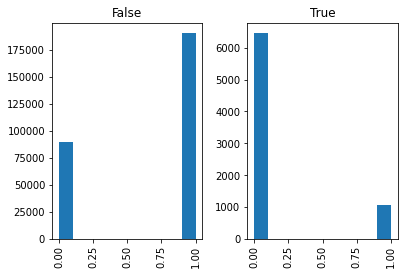

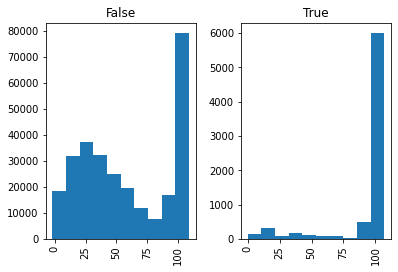

In [16]:
df.hist(column='Terminated', by='ShareholderInOtherCompanies')
df.hist(column='DurationOfExistenceInMonths', by = 'ShareholderInOtherCompanies')

In [17]:
df['MainAddressVoivodeship'] = df['MainAddressVoivodeship'].str.lower()
df['MainAddressVoivodeship'].unique()
correct_voivodeships = ['dolnośląskie', 'mazowieckie','kujawsko-pomorskie','małopolskie',
                       'zachodniopomorskie', 'łódzkie', 'lubelskie', 'pomorskie',
                        'podkarpackie', 'śląskie', 'warmińsko-mazurskie', 'świętokrzyskie',
                       'podlaskie', 'wielkopolskie', 'lubuskie', 'opolskie']

correct_records = df['MainAddressVoivodeship'].isin(correct_voivodeships)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783f336ac8>]],
      dtype=object)

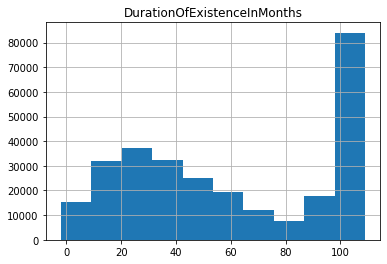

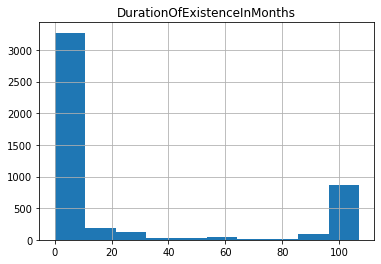

In [18]:
df[correct_records].hist(column='DurationOfExistenceInMonths')
df[~correct_records].hist(column='DurationOfExistenceInMonths')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783f170ac8>]],
      dtype=object)

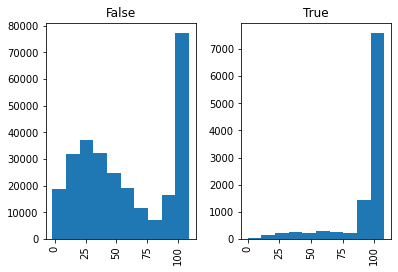

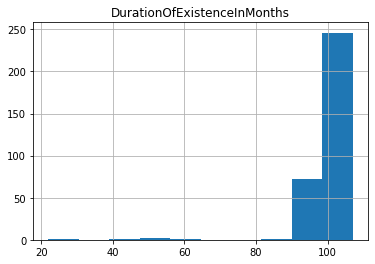

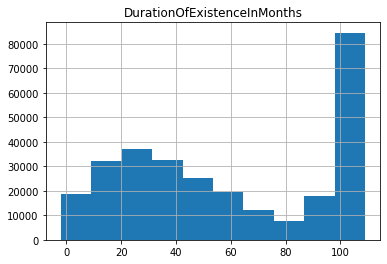

In [19]:
df.hist(column='DurationOfExistenceInMonths', by='HasLicences')
df[df['NoOfLicences'] > 5].hist(column='DurationOfExistenceInMonths')
df[df['NoOfLicences'] <= 5].hist(column='DurationOfExistenceInMonths')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783f155da0>]],
      dtype=object)

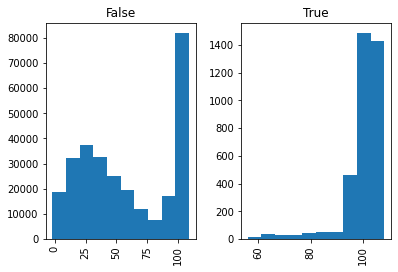

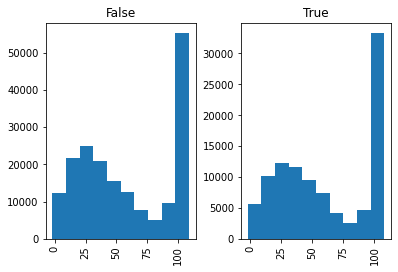

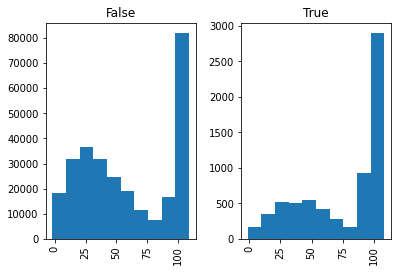

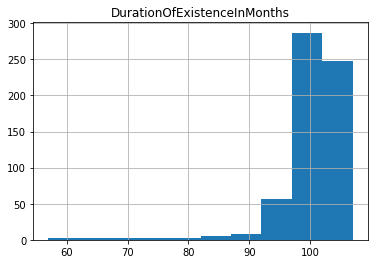

In [20]:
df.hist(column='DurationOfExistenceInMonths', by='IsPhoneNo')
df.hist(column='DurationOfExistenceInMonths', by='IsEmail')
df.hist(column='DurationOfExistenceInMonths', by='IsWWW')
df[(df['IsPhoneNo'] == True) & (df['IsEmail'] == True) & (df['IsWWW'] == True)].hist(column='DurationOfExistenceInMonths')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f784099ea58>,
      dtype=object)

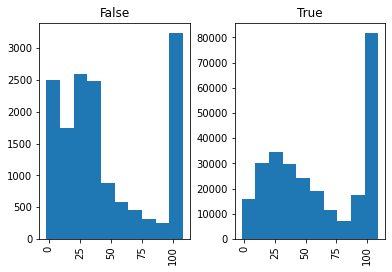

In [21]:
df.hist(column='DurationOfExistenceInMonths', by='HasPolishCitizenship')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783eedcda0>]],
      dtype=object)

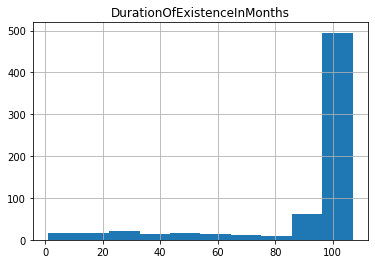

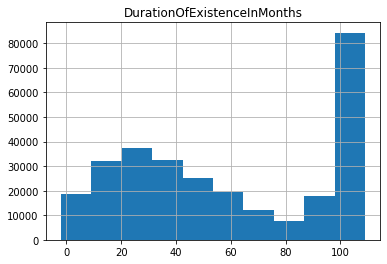

In [22]:
df[df['NoOfAdditionalPlaceOfTheBusiness'] > 3].hist(column='DurationOfExistenceInMonths')
df[df['NoOfAdditionalPlaceOfTheBusiness'] <= 3].hist(column='DurationOfExistenceInMonths')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7837f1f400>,
      dtype=object)

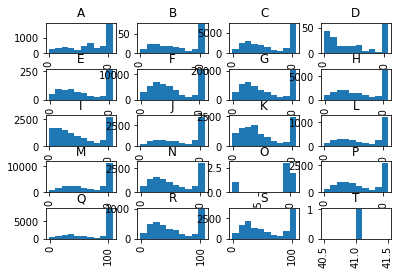

In [23]:
df.hist(column='DurationOfExistenceInMonths', by='PKDMainSection')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783e84a400>]],
      dtype=object)

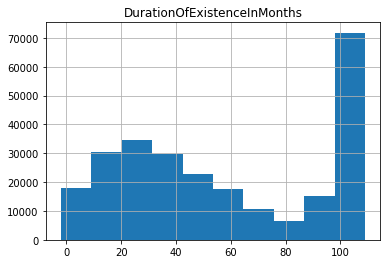

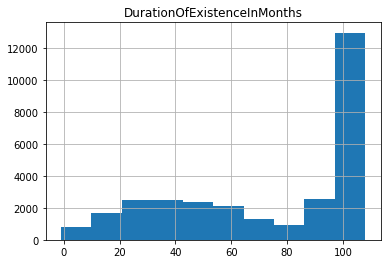

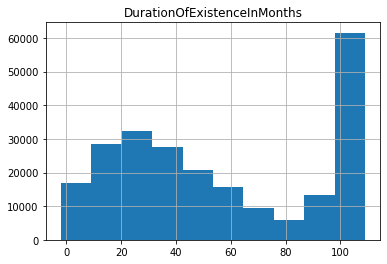

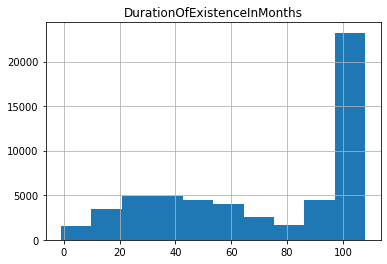

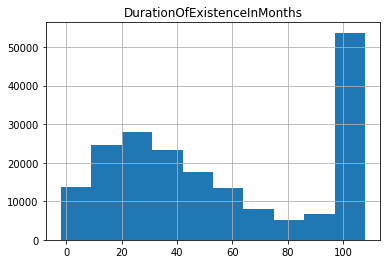

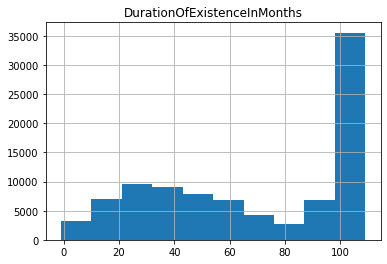

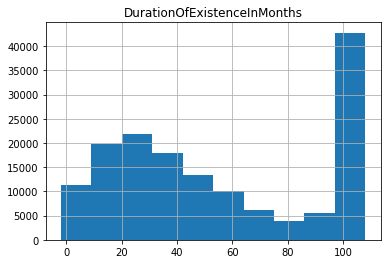

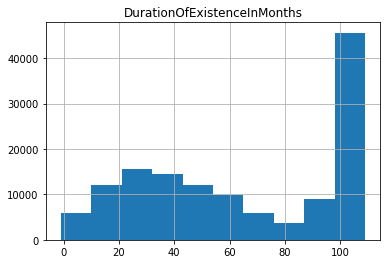

In [24]:
df[df['NoOfUniquePKDSections'] <= 5].hist(column='DurationOfExistenceInMonths')
df[df['NoOfUniquePKDSections'] > 5].hist(column='DurationOfExistenceInMonths')

df[df['NoOfUniquePKDDivsions'] <= 5].hist(column='DurationOfExistenceInMonths')
df[df['NoOfUniquePKDDivsions'] > 5].hist(column='DurationOfExistenceInMonths')

df[df['NoOfUniquePKDGroups'] <= 5].hist(column='DurationOfExistenceInMonths')
df[df['NoOfUniquePKDGroups'] > 5].hist(column='DurationOfExistenceInMonths')

df[df['NoOfUniquePKDClasses'] <= 5].hist(column='DurationOfExistenceInMonths')
df[df['NoOfUniquePKDClasses'] > 5].hist(column='DurationOfExistenceInMonths')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f783f022a20>,
      dtype=object)

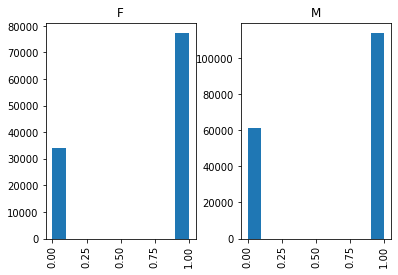

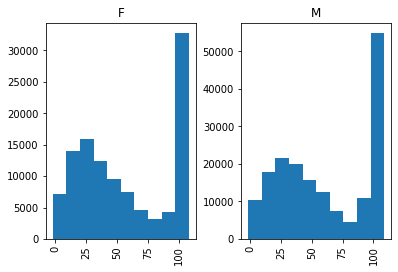

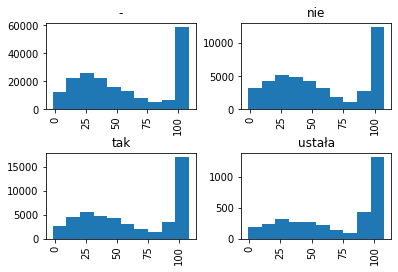

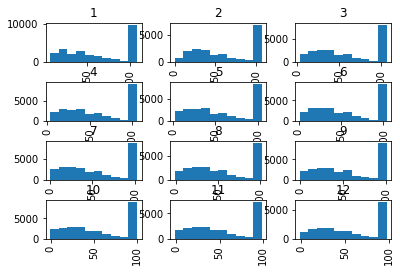

In [40]:
# brak większego wpływu cechy: Sex, CommunityProperty, Month
df.hist(column='Terminated', by='Sex')
df.hist(column='DurationOfExistenceInMonths', by='Sex')
df.hist(column='DurationOfExistenceInMonths', by='CommunityProperty')
df.hist(column = 'DurationOfExistenceInMonths', by ='Month')